<a href="https://colab.research.google.com/github/KulsoomBibi/AtomCampTesting/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cifar10 Dataset (Computer Vision).ipynb**

# **Importing Libraries**

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# **Visualizing Dataset**

In [ ]:
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
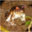

In [ ]:
x_train[0]

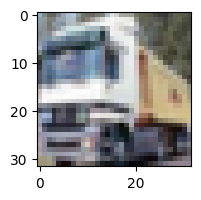

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

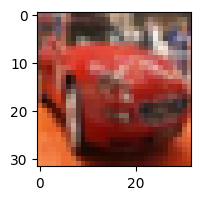

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[5])

# **Preprocessing Dataset**

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
y_data = to_categorical(y_train)
y_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
x_train.max()

255

In [ ]:
x_train.min()

0

# **Normalization**

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[49000]

array([[[0.67058824, 0.73333333, 0.83921569],
        [0.6627451 , 0.73333333, 0.83921569],
        [0.65882353, 0.73333333, 0.83921569],
        ...,
        [0.71764706, 0.76078431, 0.83137255],
        [0.70588235, 0.74509804, 0.81960784],
        [0.70980392, 0.75294118, 0.82352941]],

       [[0.66666667, 0.72156863, 0.82745098],
        [0.65882353, 0.72156863, 0.82352941],
        [0.65490196, 0.7254902 , 0.82352941],
        ...,
        [0.72941176, 0.74509804, 0.82352941],
        [0.71372549, 0.74117647, 0.81568627],
        [0.70588235, 0.74509804, 0.81960784]],

       [[0.67058824, 0.7254902 , 0.82745098],
        [0.65882353, 0.72156863, 0.81960784],
        [0.65882353, 0.7254902 , 0.82352941],
        ...,
        [0.71372549, 0.74117647, 0.81960784],
        [0.70588235, 0.7372549 , 0.81176471],
        [0.70196078, 0.74509804, 0.81568627]],

       ...,

       [[0.44313725, 0.52156863, 0.58431373],
        [0.45098039, 0.52941176, 0.59215686],
        [0.45882353, 0

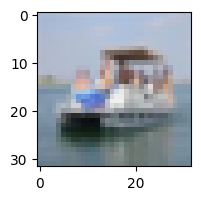

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[49000])

# **Modelling**

In [ ]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 142s 90ms/step - loss: 1.8105 - accuracy: 0.3561
Epoch 2/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.6248 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.5408 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.4799 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.4353 - accuracy: 0.4928


In [ ]:
import numpy as np
pre=ann.predict(x_test)
pred=np.argmax(pre,axis=1)
pred

313/313 [==============================] - 8s 25ms/step


array([1, 1, 8, ..., 5, 6, 7])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.478

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), input_shape=(32,32,3), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(100, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 66s 41ms/step - loss: 1.4451 - accuracy: 0.4828
Epoch 2/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1037 - accuracy: 0.6125
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9661 - accuracy: 0.6649
Epoch 4/5
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8716 - accuracy: 0.6972
Epoch 5/5
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8008 - accuracy: 0.7222


In [ ]:
result=model.predict(x_test)
res=np.argmax(result,axis=1)
res

313/313 [==============================] - 5s 15ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
accuracy_score(res,y_test)

0.6884

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_5 (Dense)             (None, 100)              

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9085 - accuracy: 0.6884


[0.9085285067558289, 0.6883999705314636]

# **Classification**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test, res)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.71      0.88      0.79      1000
           2       0.60      0.54      0.57      1000
           3       0.58      0.39      0.47      1000
           4       0.55      0.72      0.62      1000
           5       0.65      0.55      0.60      1000
           6       0.76      0.78      0.77      1000
           7       0.74      0.73      0.73      1000
           8       0.80      0.80      0.80      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

